In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
##########################
# pA Testing Starts Here #
##########################

In [3]:
daily_pA = pd.read_csv('Resources/daily_pA_ra.csv',index_col=False)

In [4]:
daily_pA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Data columns (total 5 columns):
datetime                 4509 non-null object
average_exhaustion       4509 non-null float64
average_sA               4509 non-null float64
number_extract_points    4509 non-null float64
pA                       4509 non-null float64
dtypes: float64(4), object(1)
memory usage: 176.2+ KB


In [5]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pA[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pA['pA'].values.reshape(-1,1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [7]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [10]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [11]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [12]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1, gamma=0.001, score=0.225, total=   0.4s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.215, total=   0.4s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.198, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.150, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.172, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.225, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.215, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.198, total=   0.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.150, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   37.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.001}
0.1918973685395557


In [14]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [15]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.231, total=   0.4s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.220, total=   0.4s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.211, total=   0.4s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.160, total=   0.4s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.184, total=   0.4s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.259, total=   0.4s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.246, total=   0.4s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.218, total=   0.4s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.198, total=   0.4s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] .

[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.231, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.219, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.205, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.155, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.177, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.285, total=   0.5s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.270, total=   0.5s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] .

[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.319, total=   0.5s
[CV] C=10, epsilon=0.01, gamma=0.1 ...................................
[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.281, total=   0.7s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.233, total=   0.6s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.222, total=   0.3s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.205, total=   0.5s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.160, total=   0.3s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.179, total=   0.4s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [16]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
0.3277484743582292


In [17]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [18]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.2s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.004, total=   0.2s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=0.000, total=   0.2s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.020, total=   0.2s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.000, total=   0.2s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.039, total=   0.2s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.024, total=   0.2s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.046, total=   0.2s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.

[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.174, total=   0.5s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.208, total=   0.6s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.146, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.170, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.003, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.005, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.001, t

[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.002, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.003, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=0.000, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.020, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.000, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.096, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.030, total

[CV]  C=1, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.1, score=0.277, total=   0.3s
[CV] C=1, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.1 ..
[CV]  C=1, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.1, score=0.234, total=   0.3s
[CV] C=1, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.1 ..
[CV]  C=1, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.1, score=0.262, total=   0.3s
[CV] C=1, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.1 ..
[CV]  C=1, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.1, score=0.220, total=   0.3s
[CV] C=1, coef0=4.97055205473441, degree=2, epsilon=0.1, gamma=0.001 .
[CV]  C=1, coef0=4.97055205473441, degree=2, epsilon=0.1, gamma=0.001, score=0.228, total=   0.2s
[CV] C=1, coef0=4.97055205473441, degree=2, epsilon=0.1, gamma=0.001 .
[CV]  C=1, coef0=4.97055205473441, degree=2, epsilon=0.1, gamma=0.001, score=0.217, total=   0.2s
[CV] C=1, coef0=4.97055205473441, degree=2, epsilon=0.1, gamm

[CV]  C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.001, score=0.230, total=   0.2s
[CV] C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.001 .
[CV]  C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.001, score=0.219, total=   0.2s
[CV] C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.001 .
[CV]  C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.001, score=0.202, total=   0.2s
[CV] C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.001 .
[CV]  C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.001, score=0.156, total=   0.2s
[CV] C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.001 .
[CV]  C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.001, score=0.176, total=   0.2s
[CV] C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.01 ..
[CV]  C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, gamma=0.01, score=0.290, total=   0.3s
[CV] C=1, coef0=4.97055205473441, degree=3, epsilon=0.1, g

[CV]  C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.001, score=0.193, total=   0.3s
[CV] C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01 ..
[CV]  C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01, score=0.299, total=   0.5s
[CV] C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01 ..
[CV]  C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01, score=0.282, total=   0.5s
[CV] C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01 ..
[CV]  C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01, score=0.240, total=   0.5s
[CV] C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01 ..
[CV]  C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01, score=0.273, total=   0.5s
[CV] C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01 ..
[CV]  C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma=0.01, score=0.227, total=   0.5s
[CV] C=1, coef0=4.97055205473441, degree=4, epsilon=0.1, gamma

[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.077, total=   0.2s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.061, total=   0.3s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.055, total=   0.2s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.002, total=   0.2s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.005, total=   0.2s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.2s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.020, t

[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=0.001, total=   0.3s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=0.006, total=   0.3s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.015, total=   0.3s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=0.004, total=   0.3s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.105, total=   0.4s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.028, total=   0.5s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.057, to

[CV]  C=5, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.1, score=0.267, total=   0.5s
[CV] C=5, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.1 .
[CV]  C=5, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.1, score=0.220, total=   0.5s
[CV] C=5, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.001, score=0.228, total=   0.2s
[CV] C=5, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.001, score=0.216, total=   0.2s
[CV] C=5, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.001, score=0.201, total=   0.2s
[CV] C=5, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.97055205473441, degree=2, epsilon=0.01, gamma=0.001, score=0.150, total=   0.2s
[CV] C=5, coef0=4.97055205473441, degree=2, epsilon=0

[CV]  C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.001, score=0.211, total=   0.3s
[CV] C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.001, score=0.174, total=   0.3s
[CV] C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.001, score=0.184, total=   0.4s
[CV] C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.01 .
[CV]  C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.01, score=0.293, total=   0.5s
[CV] C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.01 .
[CV]  C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.01, score=0.277, total=   0.4s
[CV] C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.01 .
[CV]  C=5, coef0=4.97055205473441, degree=3, epsilon=0.01, gamma=0.01, score=0.235, total=   0.5s
[CV] C=5, coef0=4.97055205473441, degree=3, epsilon=0.

[CV]  C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.01, score=0.282, total=   1.3s
[CV] C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.01 .
[CV]  C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.01, score=0.245, total=   1.4s
[CV] C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.01 .
[CV]  C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.01, score=0.279, total=   1.4s
[CV] C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.01 .
[CV]  C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.01, score=0.229, total=   1.4s
[CV] C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.1 ..
[CV]  C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.1, score=0.336, total=  10.1s
[CV] C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.1 ..
[CV]  C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, gamma=0.1, score=0.290, total=  10.3s
[CV] C=5, coef0=4.97055205473441, degree=4, epsilon=0.01, g

[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.076, total=   0.4s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.060, total=   0.3s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.052, total=   0.4s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=0.007, total=   0.3s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=0.004, total=   0.3s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=0.008, total=   0.3s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.012, to

[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.111, total=   0.3s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.102, total=   0.3s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.111, total=   0.3s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.074, total=   0.3s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.099, total=   0.3s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.207, total=   0.4s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.174, total=   

[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.077, total=   0.4s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.022, total=   0.4s
[CV] C=10, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.001, score=0.229, total=   0.3s
[CV] C=10, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.001, score=0.218, total=   0.4s
[CV] C=10, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.001, score=0.202, total=   0.3s
[CV] C=10, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.001, score=0.153, total=   0.3s
[CV] C=10, coef0=4.97055205473441, degree=2, epsilon=0.001, gamma=0.0

[CV]  C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.001, score=0.216, total=   0.6s
[CV] C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.001, score=0.189, total=   0.5s
[CV] C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.001, score=0.190, total=   0.6s
[CV] C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.01, score=0.295, total=   1.3s
[CV] C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.01, score=0.277, total=   1.1s
[CV] C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.97055205473441, degree=3, epsilon=0.001, gamma=0.01, score=0.236, total=   1.0s
[CV] C=10, coef0=4.97055205473441, 

[CV]  C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.01, score=0.284, total=   4.6s
[CV] C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.01, score=0.249, total=   3.8s
[CV] C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.01, score=0.285, total=   3.7s
[CV] C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.01, score=0.232, total=   3.7s
[CV] C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.1, score=0.334, total=  34.8s
[CV] C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=4.97055205473441, degree=4, epsilon=0.001, gamma=0.1, score=0.289, total=  28.1s
[CV] C=10, coef0=4.97055205473441, degree=4,

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 18.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 4.97055205473441],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [19]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 10, 'coef0': 4.97055205473441, 'degree': 4, 'epsilon': 0.1, 'gamma': 0.1}
0.29519262674740093


RBF SVR yielded the best results at 0.257 while polynomial (4th degree) was a close second at 0.244. Both have greater scores than the OLS model at 0.173. RBF will be used for Daily pA regression

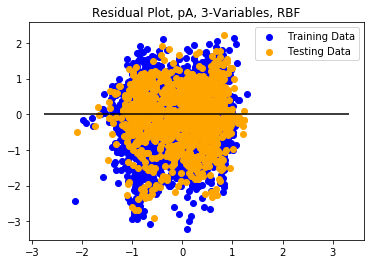

In [21]:
# Plot pA residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
fig,ax = plt.subplots()
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pA, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pA_rbf_residual_ra.png', dpi=96)
plt.show()

In [22]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [23]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [24]:
daily_pA['Predicted_pA'] = y_predicted
daily_pA['Error'] = daily_pA['Predicted_pA'] - daily_pA['pA']
daily_pA.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pA,Predicted_pA,Error
0,2002-01-02,23.489290,0.217506,86.0,0.2098,0.214199,0.004399
1,2002-01-03,23.504239,0.219029,93.0,0.2130,0.215115,0.002115
2,2002-01-04,24.692335,0.218939,89.0,0.2164,0.216277,-0.000123
3,2002-01-07,22.959558,0.217301,75.0,0.2162,0.214071,-0.002129
4,2002-01-08,24.757384,0.217990,85.0,0.2206,0.215740,-0.004860


In [25]:
# Get a datetime column
from datetime import datetime
daily_pA['datetime'] = daily_pA['datetime'].astype(str)
datetime_list = []
for i in range(len(daily_pA)):
    datetime_list.append(datetime.strptime(daily_pA['datetime'][i],'%Y-%m-%d'))

In [26]:
daily_pA['datetime'] = datetime_list
daily_pA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Data columns (total 7 columns):
datetime                 4509 non-null datetime64[ns]
average_exhaustion       4509 non-null float64
average_sA               4509 non-null float64
number_extract_points    4509 non-null float64
pA                       4509 non-null float64
Predicted_pA             4509 non-null float64
Error                    4509 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 246.7 KB


C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


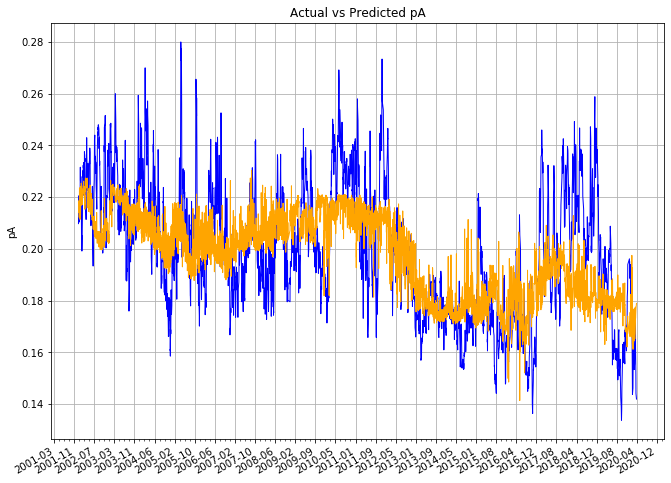

In [27]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_pA['datetime'],daily_pA['pA'],c='blue',linewidth = 1)
ax1.plot(daily_pA['datetime'],daily_pA['Predicted_pA'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pA')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pA')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/daily_pA_rbf_ra.png', dpi=100)
plt.show()

In [28]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(daily_pA['pA'],daily_pA['Predicted_pA'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 0.0003794315519331097
the R2 Score for the multivariate, RBF regression: 0.34589005313666144


In [29]:
##########################
# pB Testing Starts Here #
##########################

In [30]:
daily_pB = pd.read_csv('Resources/daily_pB_ra.csv',index_col=False)

In [31]:
daily_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 5 columns):
datetime                 2368 non-null object
average_exhaustion       2368 non-null float64
average_sA               2368 non-null float64
number_extract_points    2368 non-null float64
pB                       2368 non-null float64
dtypes: float64(4), object(1)
memory usage: 92.6+ KB


In [107]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pB[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pB['pB'].values.reshape(-1,1)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [109]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [110]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [111]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [37]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [38]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [39]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1, gamma=0.001, score=0.622, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.684, total=   0.2s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.662, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.662, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.577, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.622, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.684, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.662, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.662, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   15.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [40]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 5, 'gamma': 0.001}
0.6414047735049192


In [41]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [42]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.617, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.656, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.652, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.632, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.576, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.688, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.758, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.712, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.719, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.677, total=   0.2s
[CV] C=1, epsilon=0.001, gamma=0.1 ...................................
[CV] .

[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.689, total=   0.2s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.669, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.664, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.593, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.713, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.783, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.725, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] .

[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.749, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.638, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.701, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.675, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.675, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.603, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.721, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   19.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [43]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.01, 'gamma': 0.1}
0.7848797746012636


In [44]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [45]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.020, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.002, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.022, total=   0.1s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.051, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.050, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.044, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.052, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.032, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.017, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.1 .............

[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.364, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.143, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=-0.327, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.019, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.002, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.021

[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.018, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.002, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.021, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.050, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.230, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.229, tota

[CV]  C=1, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.1, score=0.780, total=   0.2s
[CV] C=1, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.1, score=0.712, total=   0.2s
[CV] C=1, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.1, score=0.742, total=   0.2s
[CV] C=1, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.1, score=0.700, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9406952528056025, degree=2, epsilon=0.1, gamma=0.001, score=0.623, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9406952528056025, degree=2, epsilon=0.1, gamma=0.001, score=0.679, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=2, e

[CV]  C=1, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.1, score=0.717, total=   0.4s
[CV] C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001, score=0.632, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001, score=0.692, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001, score=0.669, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001, score=0.669, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9406952528056025, degree=3, epsilon=0.1, gamma=0.001, score=0.589, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degre

[CV]  C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.001, score=0.693, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.001, score=0.703, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.001, score=0.638, total=   0.1s
[CV] C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.01, score=0.720, total=   0.2s
[CV] C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.01, score=0.791, total=   0.2s
[CV] C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.9406952528056025, degree=4, epsilon=0.1, gamma=0.01, score=0.724, total=   0.2s
[CV] C=1, coef0=3.9406952528056025, degree=4, 

[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.230, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.252, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.180, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.161, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.184, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.020, total=   0.

[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.051, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=0.000, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.019, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.001, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.021, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.049, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.

[CV]  C=5, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.1, score=0.781, total=   0.2s
[CV] C=5, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.1, score=0.709, total=   0.2s
[CV] C=5, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.1, score=0.740, total=   0.2s
[CV] C=5, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.1, score=0.698, total=   0.2s
[CV] C=5, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.001, score=0.625, total=   0.1s
[CV] C=5, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9406952528056025, degree=2, epsilon=0.01, gamma=0.001, score=0.686, total=   0.1s
[CV] C=5, coef0=3.9406952528056025, 

[CV]  C=5, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.1, score=0.716, total=   0.9s
[CV] C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001, score=0.655, total=   0.1s
[CV] C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001, score=0.721, total=   0.1s
[CV] C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001, score=0.685, total=   0.1s
[CV] C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001, score=0.692, total=   0.1s
[CV] C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9406952528056025, degree=3, epsilon=0.01, gamma=0.001, score=0.625, total=   0.1s
[CV] C=5, coef0=3.940695252805

[CV]  C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.001, score=0.731, total=   0.1s
[CV] C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.001, score=0.689, total=   0.1s
[CV] C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.01, score=0.725, total=   0.5s
[CV] C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.01, score=0.799, total=   0.4s
[CV] C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.01, score=0.735, total=   0.5s
[CV] C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.9406952528056025, degree=4, epsilon=0.01, gamma=0.01, score=0.756, total=   0.5s
[CV] C=5, coef0=3.9406952528056025, d

[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.01, score=0.185, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.225, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.246, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.169, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.159, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.186, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=0.004, total

[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.229, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.163, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.219, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.165, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.091, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.369, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.097, total=   

[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.162, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=-0.204, total=   0.1s
[CV] C=10, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.001, score=0.628, total=   0.1s
[CV] C=10, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.001, score=0.691, total=   0.1s
[CV] C=10, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.001, score=0.667, total=   0.1s
[CV] C=10, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9406952528056025, degree=2, epsilon=0.001, gamma=0.001, score=0.667, total=   0.1s
[CV] C=10, coef0=3.9406952528056025, degree=2, epsil

[CV] C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.001, score=0.698, total=   0.1s
[CV] C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.001, score=0.708, total=   0.1s
[CV] C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.001, score=0.649, total=   0.1s
[CV] C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.01, score=0.718, total=   0.2s
[CV] C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.01, score=0.789, total=   0.2s
[CV] C=10, coef0=3.9406952528056025, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9406952528056025, de

[CV]  C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.01, score=0.727, total=   0.7s
[CV] C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.01, score=0.804, total=   0.7s
[CV] C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.01, score=0.743, total=   0.7s
[CV] C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.01, score=0.760, total=   0.8s
[CV] C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.01, score=0.714, total=   0.8s
[CV] C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=3.9406952528056025, degree=4, epsilon=0.001, gamma=0.1, score=0.744, total=   6.2s
[CV] C=10, coef0=3.9

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  4.8min finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 3.9406952528056025],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [46]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 1, 'coef0': 3.9406952528056025, 'degree': 4, 'epsilon': 0.1, 'gamma': 0.1}
0.7699665601163095


RBF SVR yielded the best results at 0.762 while polynomial (4th degree) was a close second at 0.745. Both have significantly greater scores than the OLS model at 0.616. RBF will be used for Daily pB regression

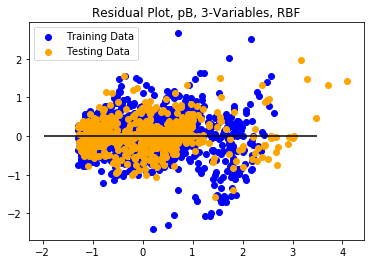

In [112]:
# Plot pB residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.01)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pB, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pB_rbf_residual_ra.png', dpi=96)
plt.show()

In [113]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [114]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.01)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [115]:
daily_pB['Predicted_pB'] = y_predicted
daily_pB['Error'] = daily_pB['Predicted_pB'] - daily_pB['pB']
daily_pB.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pB,Predicted_pB,Error
0,2009-08-12,47.836660,0.236600,148.0,1.55600,1.457626,-0.098374
1,2009-08-13,45.127344,0.239869,141.0,1.44000,1.542349,0.102349
2,2009-08-14,46.250910,0.237382,154.0,1.47500,1.456645,-0.018355
3,2009-08-15,47.276493,0.238790,152.0,1.48425,1.508437,0.024187
4,2009-08-16,45.022368,0.240766,162.0,1.40280,1.550130,0.147330


In [116]:
# Get a datetime column
from datetime import datetime
daily_pB['datetime'] = daily_pB['datetime'].astype(str)
datetime_list = []
for i in range(len(daily_pB)):
    datetime_list.append(datetime.strptime(daily_pB['datetime'][i],'%Y-%m-%d'))

In [117]:
daily_pB['datetime'] = datetime_list
daily_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 7 columns):
datetime                 2368 non-null datetime64[ns]
average_exhaustion       2368 non-null float64
average_sA               2368 non-null float64
number_extract_points    2368 non-null float64
pB                       2368 non-null float64
Predicted_pB             2368 non-null float64
Error                    2368 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 129.6 KB


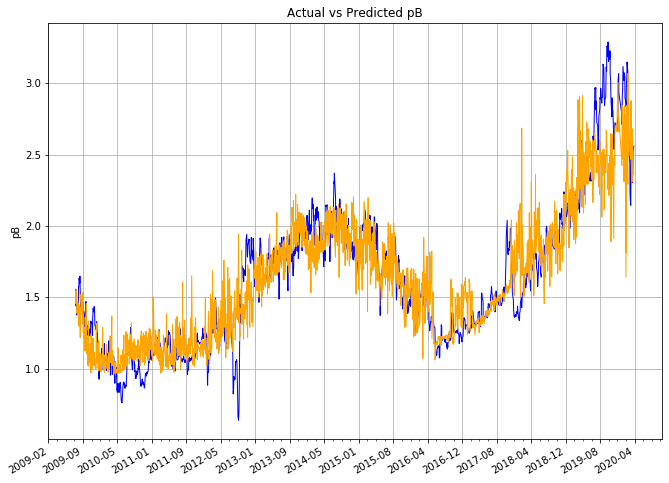

In [118]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_pB['datetime'],daily_pB['pB'],c='blue',linewidth = 1)
ax1.plot(daily_pB['datetime'],daily_pB['Predicted_pB'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pB')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pB')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/daily_pB_rbf_ra.png', dpi=100)
plt.show()

In [119]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(daily_pB['pB'],daily_pB['Predicted_pB'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 0.04750223711472999
the R2 Score for the multivariate, RBF regression: 0.8022951719817755


In [55]:
##########################
# pC Testing Starts Here #
##########################

In [56]:
daily_pC = pd.read_csv('Resources/daily_pC_ra.csv',index_col=False)

In [57]:
daily_pC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 5 columns):
datetime                 470 non-null object
average_exhaustion       470 non-null float64
average_sA               470 non-null float64
number_extract_points    470 non-null float64
pC                       470 non-null float64
dtypes: float64(4), object(1)
memory usage: 18.4+ KB


In [120]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pC[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pC['pC'].values.reshape(-1,1)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [122]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [123]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [124]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [63]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [64]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [65]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.154, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.154, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.078, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.212, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.013, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.154, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=5, gamma=0.001 ................................................
[CV] .................... C=5, gamma=0.001, score=0.005, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.154, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.154, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.078, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.212, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.005, total=   0.0s
[CV] C=5, gamma=0.1 ..................................................
[CV] ...................... C=5, gamma=0.1, score=0.154, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.8s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [66]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.001}
0.12244750966758083


In [67]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [68]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.050, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.053, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.016, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.052, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.035, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.212, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.214, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.126, total=   0.0s
[CV] 

[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.137, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.139, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.046, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.152, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.071, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.285, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.320, total=   0.0s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] .

[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.386, total=   0.0s
[CV] C=10, epsilon=0.01, gamma=0.1 ...................................
[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.195, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.156, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.163, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.074, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.174, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.063, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.5s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [69]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
0.343297662562162


In [70]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [71]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.003, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.008, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.065, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=0.000, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.007, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.036, total=   0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.001, score=0.000, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.001, score=-0.005, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.01, score=0.035, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.01, score=0.039, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.01, score=-0.029, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.01, score=0.029, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.01, gamma=0.01 ................


[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1, score=0.118, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1, score=0.166, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.1, score=-0.139, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.008, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.010, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.084, total=   0.0s
[CV] C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.000, total

[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.196, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.203, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.152, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.203, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1 ..................
[CV]  C=1, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=-0.122, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.001, score=0.104, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=2, epsilon=0.001, ga

[CV]  C=1, coef0=3.0963058443232874, degree=2, epsilon=0.1, gamma=0.1, score=0.116, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001, score=0.158, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001, score=0.150, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001, score=0.076, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001, score=0.196, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=1, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001, score=0.044, total=   0.0s
[CV] C=1, coef0=3.0963

[CV]  C=1, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.1, score=0.351, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.1, score=0.294, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.1, score=0.380, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.1, score=0.423, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=1, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.1, score=0.173, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001, score=0.178, total=   0.0s
[CV] C=1, coef0=3.0963058443232874, de

[CV]  C=5, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.384, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.01, gamma=0.1 .................
[CV]  C=5, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.024, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.005, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.007, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.082, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=0.002, total=   0.0s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.004, total

[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=-0.004, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=-0.006, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.164, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.180, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.241, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=-0.264, total=   0.0s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.004, total=   0.0

[CV]  C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.01, score=0.263, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.01, score=0.176, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.01, score=0.275, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.01, score=0.105, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.1, score=0.302, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.0963058443232874, degree=2, epsilon=0.001, gamma=0.1, score=0.338, total=   0.0s
[CV] C=5, coef0=3.096305844323287

[CV]  C=5, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.1, score=0.324, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.1, score=0.362, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.1, score=0.436, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.1, score=0.180, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0963058443232874, degree=3, epsilon=0.01, gamma=0.001, score=0.173, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0963058443232874, degree=3, epsilon=0.01, gamma=0.001, score=0.176, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, 

[CV]  C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001, score=0.223, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001, score=0.218, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001, score=0.152, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001, score=0.261, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.001, score=0.099, total=   0.0s
[CV] C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.0963058443232874, degree=4, epsilon=0.01, gamma=0.01, score=0.310, total=   0.0s
[CV] C=5, coef0=3.0963058443232

[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.195, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.384, total=   0.0s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.025, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.004, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.008, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.065, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0

[CV]  C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.352, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=-0.390, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.008, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.010, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.084, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.000, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.0

[CV]  C=10, coef0=3.0963058443232874, degree=2, epsilon=0.1, gamma=0.1, score=0.337, total=   0.0s
[CV] C=10, coef0=3.0963058443232874, degree=2, epsilon=0.1, gamma=0.1 
[CV]  C=10, coef0=3.0963058443232874, degree=2, epsilon=0.1, gamma=0.1, score=0.273, total=   0.0s
[CV] C=10, coef0=3.0963058443232874, degree=2, epsilon=0.1, gamma=0.1 
[CV]  C=10, coef0=3.0963058443232874, degree=2, epsilon=0.1, gamma=0.1, score=0.438, total=   0.0s
[CV] C=10, coef0=3.0963058443232874, degree=2, epsilon=0.1, gamma=0.1 
[CV]  C=10, coef0=3.0963058443232874, degree=2, epsilon=0.1, gamma=0.1, score=0.084, total=   0.0s
[CV] C=10, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001, score=0.191, total=   0.0s
[CV] C=10, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.0963058443232874, degree=3, epsilon=0.001, gamma=0.001, score=0.183, total=   0.0s
[CV] C=10, coef0=3.0963058443232874

[CV]  C=10, coef0=3.0963058443232874, degree=3, epsilon=0.1, gamma=0.1, score=0.215, total=   0.1s
[CV] C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001, score=0.254, total=   0.0s
[CV] C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001, score=0.277, total=   0.0s
[CV] C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001, score=0.179, total=   0.0s
[CV] C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001, score=0.278, total=   0.0s
[CV] C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.0963058443232874, degree=4, epsilon=0.001, gamma=0.001, score=0.111, total=   0.0s
[CV] C=10, 

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:   11.6s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 3.0963058443232874],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [72]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 1, 'coef0': 3.0963058443232874, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.1}
0.3492857270230592


RBF SVR yielded the best results at 0.223 while polynomial (4th degree) was a close second at 0.220. Both have significantly greater scores than the OLS model at 0.121. RBF will be used for Daily pC regression even though the score is generally low

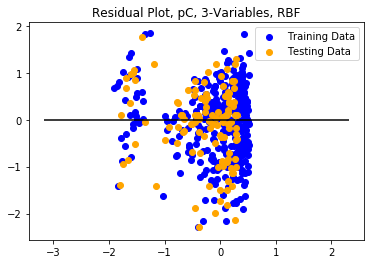

In [125]:
# Plot pC residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.1)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pC, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pC_rbf_residual_ra.png', dpi=96)
plt.show()

In [126]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [127]:
model = SVR(kernel='rbf', C=5, gamma=0.1, epsilon=0.1)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [128]:
daily_pC['Predicted_pC'] = y_predicted
daily_pC['Error'] = daily_pC['Predicted_pC'] - daily_pC['pC']
daily_pC.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pC,Predicted_pC,Error
0,2017-08-23,43.194169,0.185240,111.0,0.001333,0.001418,0.000084
1,2017-08-24,43.655595,0.188209,145.0,0.001667,0.001472,-0.000195
2,2017-08-25,43.776295,0.189317,157.0,0.001667,0.001633,-0.000034
3,2017-08-28,42.783531,0.189823,150.0,0.001556,0.001495,-0.000060
4,2017-08-29,43.937784,0.189681,136.0,0.001417,0.001411,-0.000006


In [129]:
# Get a datetime column
from datetime import datetime
daily_pC['datetime'] = daily_pC['datetime'].astype(str)
datetime_list = []
for i in range(len(daily_pC)):
    datetime_list.append(datetime.strptime(daily_pC['datetime'][i],'%Y-%m-%d'))

In [130]:
daily_pC['datetime'] = datetime_list
daily_pC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 7 columns):
datetime                 470 non-null datetime64[ns]
average_exhaustion       470 non-null float64
average_sA               470 non-null float64
number_extract_points    470 non-null float64
pC                       470 non-null float64
Predicted_pC             470 non-null float64
Error                    470 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 25.8 KB


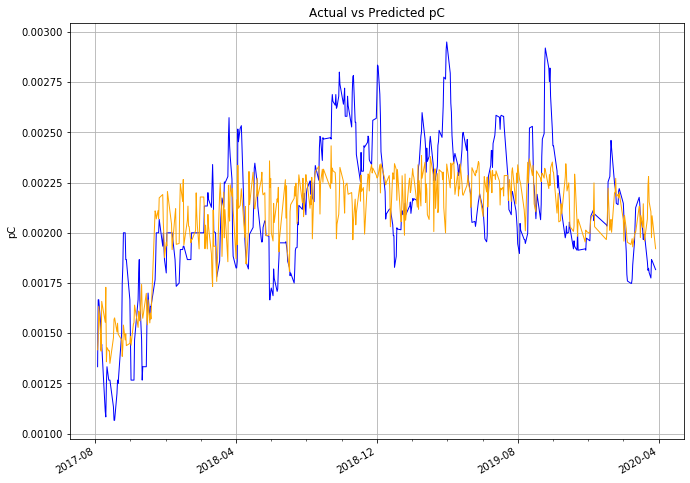

In [131]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_pC['datetime'],daily_pC['pC'],c='blue',linewidth = 1)
ax1.plot(daily_pC['datetime'],daily_pC['Predicted_pC'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pC')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pC')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/daily_pC_rbf_ra.png', dpi=100)
plt.show()

In [132]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(daily_pC['pC'],daily_pC['Predicted_pC'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 6.707770791050094e-08
the R2 Score for the multivariate, RBF regression: 0.4411085288650043


In [81]:
##########################
# pD Testing Starts Here #
##########################

In [82]:
daily_pD = pd.read_csv('Resources/daily_pD_ra.csv',index_col=False)

In [83]:
daily_pD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 5 columns):
datetime                 2368 non-null object
average_exhaustion       2368 non-null float64
average_sA               2368 non-null float64
number_extract_points    2368 non-null float64
pD                       2368 non-null float64
dtypes: float64(4), object(1)
memory usage: 92.6+ KB


In [133]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pD[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pD['pD'].values.reshape(-1,1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [135]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [136]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [137]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [89]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [90]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [91]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.187, total=   0.1s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.104, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.133, total=   0.1s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.097, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.133, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.187, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.104, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.133, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.097, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.133, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   15.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [92]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.001}
0.13094719472216995


In [93]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [94]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.140, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.116, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.134, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.129, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.137, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.296, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.239, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.244, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.243, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.243, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.1 ...................................
[CV] ....... C=1, epsilon=0.001, gamma=0.1, score=0.521, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.1 ...................................
[CV] .

[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.136, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.159, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.373, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.299, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.330, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.293, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.292, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.1 ....................................
[CV] .

[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.167, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.145, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.168, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.398, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.318, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.356, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.310, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   13.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [95]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
0.5740170733957449


In [96]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [97]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.009, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.002, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.019, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.009, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.055, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.059, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.042, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0

[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.075, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.095, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.099, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.011, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.003, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.021,

[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.003, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.020, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.008, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.066, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.086, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.064, total=

[CV]  C=1, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.1, score=0.362, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.1, score=0.277, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.1, score=0.310, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.4754974379411365, degree=2, epsilon=0.1, gamma=0.001, score=0.176, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.4754974379411365, degree=2, epsilon=0.1, gamma=0.001, score=0.120, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.4754974379411365, degree=2, epsilon=0.1, gamma=0.001, score=0.143, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=2,

[CV]  C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.001, score=0.125, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.001, score=0.150, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.001, score=0.121, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.001, score=0.153, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.01, score=0.376, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.4754974379411365, degree=3, epsilon=0.1, gamma=0.01, score=0.298, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=3

[CV]  C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.01, score=0.387, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.01, score=0.317, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.01, score=0.369, total=   0.2s
[CV] C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.01, score=0.301, total=   0.3s
[CV] C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.01, score=0.321, total=   0.1s
[CV] C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.1 .
[CV]  C=1, coef0=3.4754974379411365, degree=4, epsilon=0.1, gamma=0.1, score=0.475, total=   0.4s
[CV] C=1, coef0=3.4754974379411365, degree=4, epsilo

[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.010, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.002, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.003, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.020, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.010, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=0.002, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, sco

[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.019, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.009, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.084, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.101, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.062, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.043, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.090, tot

[CV]  C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.001, score=0.192, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.001, score=0.116, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.001, score=0.139, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.001, score=0.111, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.001, score=0.145, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.4754974379411365, degree=2, epsilon=0.01, gamma=0.01, score=0.345, total=   0.1s
[CV] C=5, coef0=3.4754974379411

[CV]  C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.01, score=0.390, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.01, score=0.309, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.01, score=0.360, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.01, score=0.280, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.01, score=0.307, total=   0.1s
[CV] C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=3.4754974379411365, degree=3, epsilon=0.01, gamma=0.1, score=0.386, total=   0.5s
[CV] C=5, coef0=3.4754974379411365, degree

[CV]  C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.01, score=0.328, total=   0.3s
[CV] C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.01, score=0.360, total=   0.3s
[CV] C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.1, score=0.501, total=   1.6s
[CV] C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.1, score=0.509, total=   1.8s
[CV] C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.1, score=0.568, total=   1.6s
[CV] C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.1 
[CV]  C=5, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.1, score=0.410, total=   1.8s
[CV] C=5, coef0=3.4754974379411365, degree=4, ep

[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=0.006, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.009, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.000, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.109, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.096, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.068, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.008, to

[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.033, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.119, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.100, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.135, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.096, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.010, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.002, tota

[CV]  C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.01, score=0.367, total=   0.1s
[CV] C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.01, score=0.288, total=   0.1s
[CV] C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.01, score=0.322, total=   0.1s
[CV] C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.01, score=0.272, total=   0.1s
[CV] C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.01, score=0.289, total=   0.1s
[CV] C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=3.4754974379411365, degree=2, epsilon=0.001, gamma=0.1, score=0.371, total=   0.3s
[CV] C=10, coef0=3.4

[CV]  C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.01, score=0.322, total=   0.2s
[CV] C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1, score=0.372, total=   0.9s
[CV] C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1, score=0.319, total=   0.8s
[CV] C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1, score=0.451, total=   0.8s
[CV] C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1, score=0.399, total=   0.9s
[CV] C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=3.4754974379411365, degree=3, epsilon=0.001, gamma=0.1, score=0.414, total=   1.0s
[CV] C=10, coef0=3.475497437

[CV]  C=10, coef0=3.4754974379411365, degree=4, epsilon=0.001, gamma=0.1, score=0.572, total=   4.1s
[CV] C=10, coef0=3.4754974379411365, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=3.4754974379411365, degree=4, epsilon=0.001, gamma=0.1, score=0.391, total=   3.7s
[CV] C=10, coef0=3.4754974379411365, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=3.4754974379411365, degree=4, epsilon=0.001, gamma=0.1, score=0.495, total=   4.0s
[CV] C=10, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.001, score=0.358, total=   0.1s
[CV] C=10, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.001, score=0.282, total=   0.1s
[CV] C=10, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=3.4754974379411365, degree=4, epsilon=0.01, gamma=0.001, score=0.308, total=   0.1s
[CV] C=10, coef0=3.4754

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 3.4754974379411365],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [98]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 5, 'coef0': 3.4754974379411365, 'degree': 4, 'epsilon': 0.001, 'gamma': 0.1}
0.49967615043813074


RBF SVR yielded the best results at 0.488 while polynomial (4th degree) was in second at 0.435. Both have significantly greater scores than the OLS model at 0.128. RBF will be used for Daily pD regression

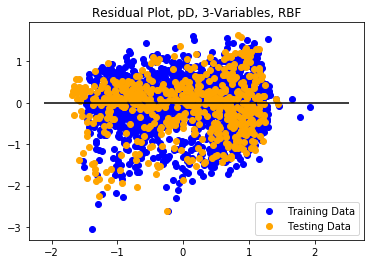

In [99]:
# Plot pD residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pD, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pD_rbf_residual_ra.png', dpi=96)
plt.show()

In [100]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [101]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [102]:
daily_pD['Predicted_pD'] = y_predicted
daily_pD['Error'] = daily_pD['Predicted_pD'] - daily_pD['pD']
daily_pD.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pD,Predicted_pD,Error
0,2009-08-12,47.836660,0.236600,148.0,0.01700,0.017569,0.000569
1,2009-08-13,45.127344,0.239869,141.0,0.01900,0.019502,0.000502
2,2009-08-14,46.250910,0.237382,154.0,0.01800,0.017535,-0.000465
3,2009-08-15,47.276493,0.238790,152.0,0.01825,0.018650,0.000400
4,2009-08-16,45.022368,0.240766,162.0,0.01825,0.019223,0.000973


In [103]:
# Get a datetime column
from datetime import datetime
daily_pD['datetime'] = daily_pD['datetime'].astype(str)
datetime_list = []
for i in range(len(daily_pD)):
    datetime_list.append(datetime.strptime(daily_pD['datetime'][i],'%Y-%m-%d'))

In [104]:
daily_pD['datetime'] = datetime_list
daily_pD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 7 columns):
datetime                 2368 non-null datetime64[ns]
average_exhaustion       2368 non-null float64
average_sA               2368 non-null float64
number_extract_points    2368 non-null float64
pD                       2368 non-null float64
Predicted_pD             2368 non-null float64
Error                    2368 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 129.6 KB


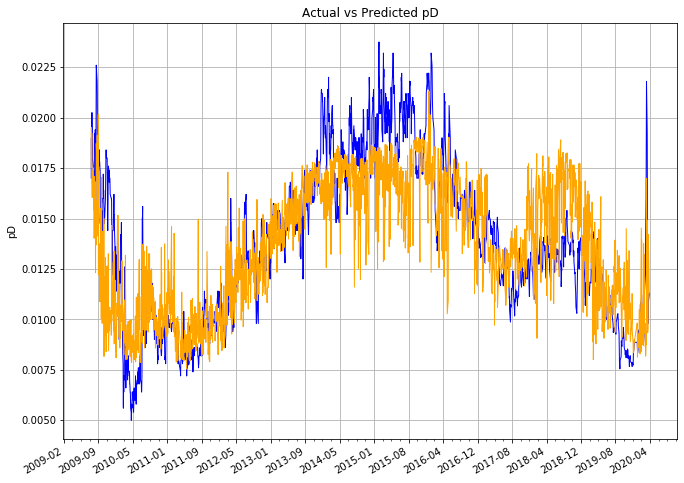

In [105]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_pD['datetime'],daily_pD['pD'],c='blue',linewidth = 1)
ax1.plot(daily_pD['datetime'],daily_pD['Predicted_pD'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pD')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pD')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/daily_pD_rbf_ra.png', dpi=100)
plt.show()

In [106]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(daily_pD['pD'],daily_pD['Predicted_pD'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 6.558265518951475e-06
the R2 Score for the multivariate, RBF regression: 0.5886406360639453
